## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Audio processing
import librosa as lr
import librosa.display
import IPython.display as ipd

**Get the Data**

In [2]:
audio_f= 'data/kids_are_talking_by_the_door.wav'

In [3]:
#Play audio file
ipd.Audio(audio_f)

**Load Audio file to python**

In [4]:
signal,sr=lr.load(audio_f,sr=22050)

In [5]:
#convert numpy to dataseries
audio_df=pd.DataFrame(signal,columns=['Signal'])

## EDA

**Check out the info(), head(), and describe() methods on audio**

In [6]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72838 entries, 0 to 72837
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Signal  72838 non-null  float32
dtypes: float32(1)
memory usage: 284.7 KB


In [7]:
print(audio_df.head(5))
print('shape signal: {}'.format(signal.shape))
print('sr: {}'.format(sr))

         Signal
0  5.376539e-08
1 -2.123315e-08
2 -6.047834e-09
3  3.898599e-08
4 -7.654313e-08
shape signal: (72838,)
sr: 22050


In [8]:
audio_df.describe()

,Signal
count,7.283800e+04
mean,9.149981e-07
std,3.998532e-03
min,-3.783945e-02
25%,-1.652451e-05
50%,-4.508482e-14
75%,6.689216e-06
max,4.100873e-02


**Histogram**

<Axes: >

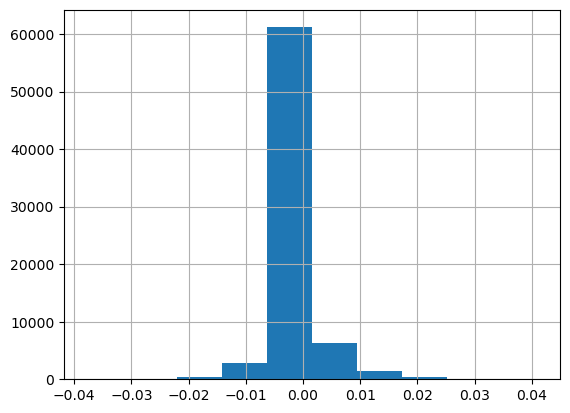

In [9]:
audio_df['Signal'].hist()

**waveform**

Text(0.5, 1.0, 'Kids are talking by the door (Waveform)')

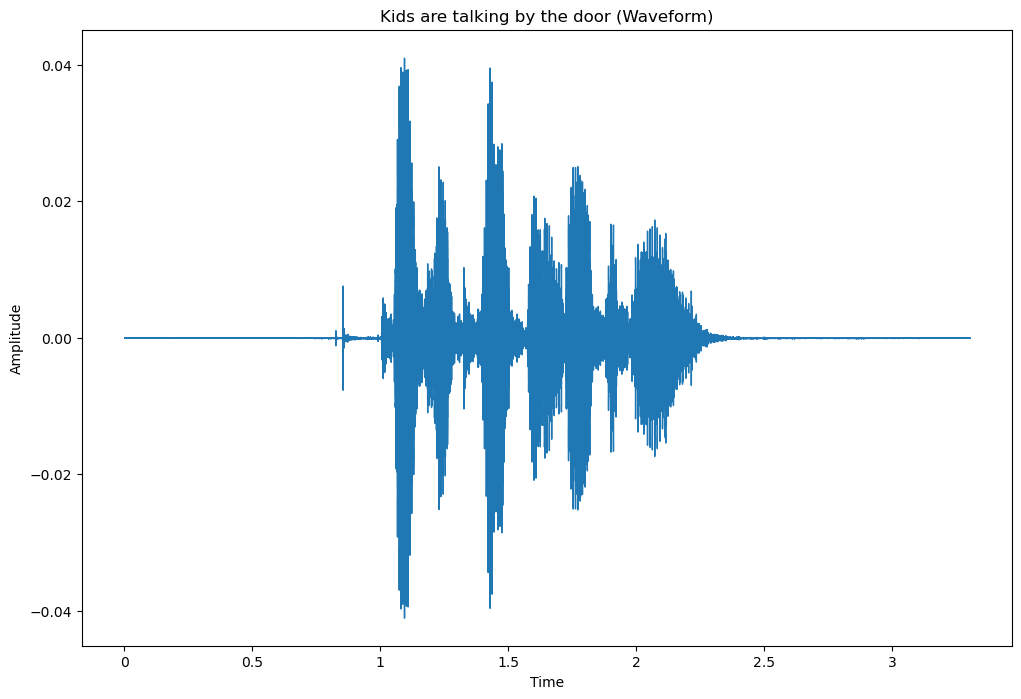

In [40]:
plt.figure(figsize=(12,8))
librosa.display.waveshow(signal,sr=22050)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Kids are talking by the door (Waveform)')

In [22]:
#Detect non-silent segments 
non_silent_segment=librosa.effects.split(signal,top_db=20)
print('Start:',non_silent_segment[0,0])
print('End:',non_silent_segment[0,1])
print('Duration:',(non_silent_segment[0,1]-non_silent_segment[0,0])/sr)

Start: 22528
End: 49664
Duration: 1.230657596371882


In [38]:
#remove silence
signal_trimmed=librosa.effects.trim(signal,top_db=20)
audio_dftrim=pd.DataFrame(signal_trimmed[0])
audio_dftrim.describe()

,0
count,27136.000000
mean,0.000003
std,0.006546
min,-0.037839
25%,-0.003023
50%,-0.000208
75%,0.002473
max,0.041009


,0
0,-0.000806
1,-0.000328
2,-0.000065
3,-0.001209
4,0.000439
...,...
27131,0.000971
27132,0.000788
27133,0.000598
27134,0.000500


Text(0.5, 1.0, 'Kids are talking by the door (Trimmed Waveform)')

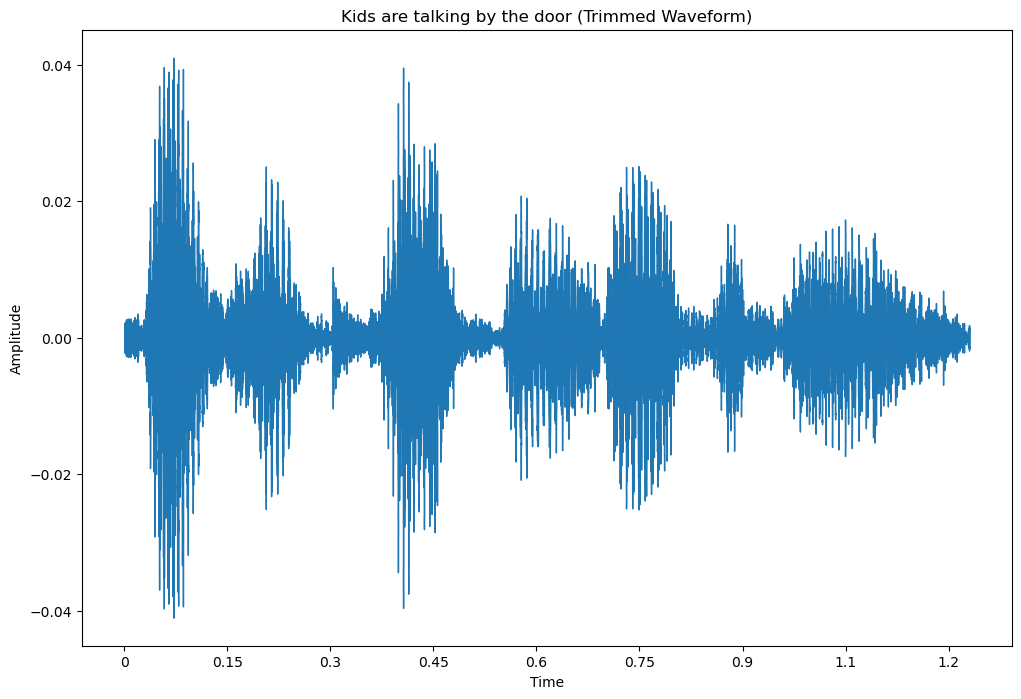

In [41]:
#Visualize non silent sections
plt.figure(figsize=(12,8))
librosa.display.waveshow(signal_trimmed[0],sr=22050)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Kids are talking by the door (Trimmed Waveform)')